Case 2. Viscously damped model.

So far, the effect of viscous damping has been neglected. In many real life systems this assumption can be valid at some extent because normally damping is small. However, all systems present energy dissipation which is normally modeled as viscous damping because is mathematically simple and gives good approximations for other types of damping.  

The effect of damping is to dissipate energy. This means the oscillations will no longer be sustained and the amplitude will decay every cycle depending upon the amount of damping.

The mathematical model is presented in figure 2.13. This SDOF model is now called mass-stiffness-damper model (MKC).
<div>
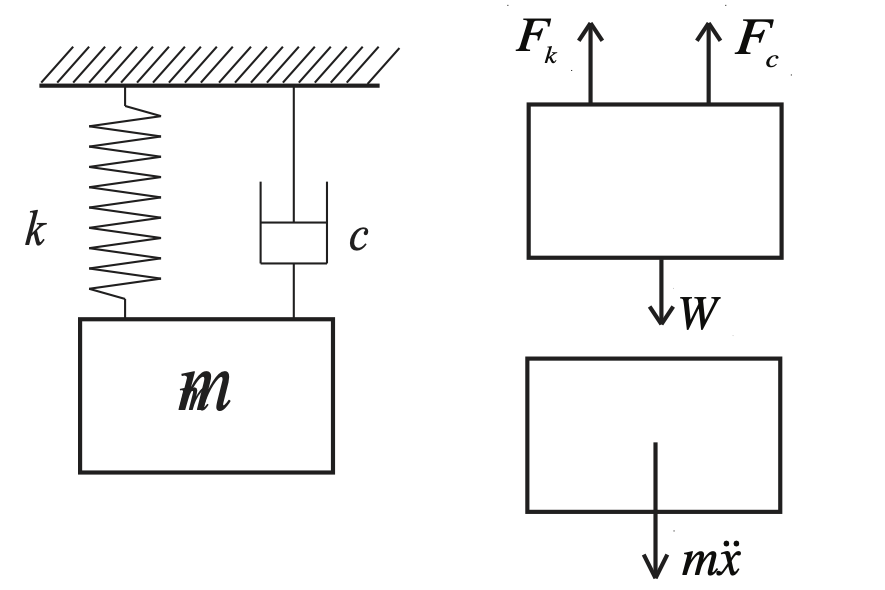
</div>
Figure 3. Schematics of a SDOF model with viscous damping.

Applying Newton method, the equation of motion can be expressed by:

$\quad m \ddot{x} + c \dot{x} + kx = 0$

The solution can be obtained by applying differential opertors and solving the characteristic equation for its roots $s_{1,2}$:

$\quad m s^2 + c s + k = 0$

Using the quadratic formula:

$\quad s_{1,2} = \frac{-c \pm \sqrt{c^2-4mk}}{2m}$

By taking the discrimminant, the nature of the roots can be evaluated:

$\quad \sqrt{c^2-4mk}=0$

Which gives the critical damping constant, i.e. the value of damping that defines if the roots are real of complex conjugates. This in turn defines the dynamic behaviour of the system

$\quad c_c = 2 \sqrt{km}=2m\omega_n$

Where $\omega_n$ is the natural frequency:

$\quad \omega_n=\sqrt{\frac{k}{m}}$

The ratio between the actual damping constant $c$ and the critical damping ratio $c_c$ gives the viscous damping gratio:

$\quad \zeta=\frac{c}{c_c}=\frac{c}{2\sqrt{mk}}=\frac{c}{2m\omega_n}$

Sometimes expressed as percentage:

$\quad  \% \zeta =\zeta*100 $

Then, the equation of motion can also expressed as:

$\quad \ddot{x} + 2\zeta\omega_n\dot{x} + \omega_n^2x = 0$

There are three possible cases depending on thre nature of the roots. When the real damping constant is less than the critical damping ratio, i.e. $\zeta<1$ the roots are complex conjugates and the system is said to be underdamped. The roots are expressed and simplified as:

$\quad s_{1,2} = -\frac{c}{2m} \pm \frac{\sqrt{c^2-4mk}}{2m}$

$\quad s_{1,2} = -\frac{c}{2m} \pm \sqrt{(\frac{c}{2m})^2-\frac{k}{m}}$

$\quad s_{1,2} = - \zeta\omega_n \pm \sqrt{(\zeta\omega_n)^2-\omega_n^2} $

$\quad s_{1,2} = - \zeta\omega_n \pm \omega_n \sqrt{\zeta^2-1} $

$\quad s_{1,2} = - \zeta\omega_n \pm j\omega_n \sqrt{1-\zeta^2} $

$\quad s_{1,2} = - \zeta\omega_n \pm j\omega_d $

The term $ \omega_d= \omega_n \sqrt{1-\zeta^2}$ is called the damped natural frequency and represents the actual frequency of free oscillation for an underdamped system.

The most general solution for the system is given by:

$\quad x(t) = C_1 e^{s_1 t} + C_2 e^{s_2 t}$

$\quad x(t) = C_1 e^{- \zeta\omega_n + j\omega_d t} + C_2 e^{- \zeta\omega_n - j\omega_d t}$

$\quad x(t) = e^{-\zeta\omega_nt}\left(C_1 e^{j \omega_d t} + C_2 e ^{-j \omega_d t}\right)$

Using Euler´s relation $e^{\pm j \omega_d t} = cos (\omega_d t) \pm sin (\omega_d t) $ the solution can be expressed as:

$\quad x(t) =e^{ - \zeta\omega_n t } \left(C_1 cos (\omega_d t) +j  C_1 sin (\omega_d t) + C_2 cos (\omega_d t) - j C_2 sin (\omega_d t\right)$


$\quad x(t) = e^{-\zeta\omega_nt}\left(A \cos{\omega_d t} + B \sin{\omega_d t}\right)$


Where $A=C_1 + C_2$ and $B=j(C_1 - C_2)$.


Considering the initial conditions, the equation can be written as:

$\quad x(t) = e^{-\zeta\omega_nt}\left(x_0 \cos{\omega_d t} + \frac{\zeta \omega_n x_0 + v_0}{\omega_d} \sin{\omega_d t}\right)$

And also expressed as:

$x(t)= Ce^{-\zeta\omega_nt}sin(\omega_d t + \phi)$

Where

$C=\sqrt\frac{(\dot{x_0}+\zeta\omega_nx_0)^2+(x_0\omega_d)^2}{\omega_d^2}$

and 

$\phi=tan^{-1}\frac{x_0\omega_d}{\dot{x_0}+\zeta\omega_nx_0}$




In [6]:
import numpy as np    # numpy is the main module for numeric calculations, which will be called as np

%matplotlib inline

# Import the plotting module 
import matplotlib.pyplot as plt

# Define system Parameters
m = 1.0                   # kg
k = 1.0                   # N/m 
wn = np.sqrt(k/m)         # Natural Frequency (rad/s)

In [14]:
# Change integration time and initial conditions if needed

# Set up simulation parameters
t = np.linspace(0, 50, 501)         

# Define the initial conditions for displacement x(0) and velocity x_dot(0)
x0 = np.array([1.0, 0])

In [15]:
z = 0.05                  # Viscous damping ratio
c = 2*z*wn*m              # Damping constant (N/(m/s))
wd = wn*np.sqrt(1 - z**2) # Damped natural frequency (rad/s)

In [16]:
# Calculate system response x(t)
x = np.exp(-z*wn*t)*(x0[0]*np.cos(wd*t) + (z*wn*x0[0] + x0[1])/wd * np.sin(wd*t))

# Response can also be expressed using the amplitude C and phase angle

# Calculate amplitude and exponential decay
amp = np.sqrt(x0[0]**2 + ((z*wn*x0[0] + x0[1])/wd)**2)
phase = np.arctan((x0[0]*wd)/(x0[1]+z*wn*x0[0])) 
decay_env = amp * np.exp(-z*wn*t)

x = decay_env * np.sin(wd*t+phase)

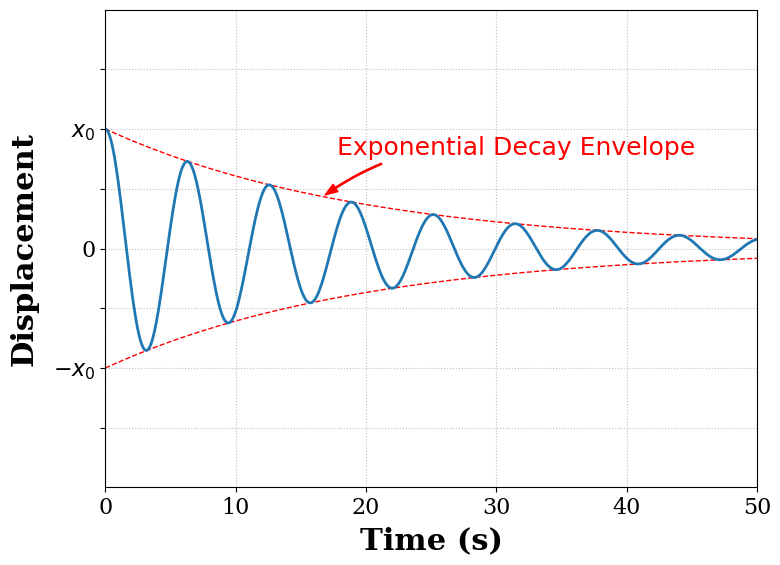

In [17]:
# Set format for figure and plot the results

# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Modify the axis units
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=16)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=16)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Activate and edit the grid
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', family='serif', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Displacement', family='serif', fontsize=22, weight='bold', labelpad=10)

# plot the decay envelope
plt.plot(t, decay_env, linewidth=1.0, linestyle = '--', color = "red")
plt.plot(t, -decay_env, linewidth=1.0, linestyle = '--', color = "red")

plt.plot(t, x, linewidth=2, linestyle = '-', label=r'Response')

# Set axis limits
plt.xlim(0,50)
plt.ylim(-2,2)

plt.yticks([-1.5, -1, -0.5, 0, 0.5, 1, 1.5], ['', r'$-x_0$', '', '0', '', r'$x_0$', ''])

plt.annotate('Exponential Decay Envelope',
         xy=(t[int(len(t)/3)],decay_env[int(len(t)/3)]), xycoords='data',
         xytext=(+10, +30), textcoords='offset points', fontsize=18,
         arrowprops=dict(arrowstyle="simple, head_width = 0.35, tail_width=0.05", connectionstyle="arc3, rad=.2", color="red"), color = "red")


# # Create the legend, then fix the fontsize
# leg = plt.legend(loc='upper right', fancybox=True)
# ltext  = leg.get_texts()
# plt.setp(ltext,family='serif',fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad = 0.5)

# save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('Damped_free_vibration.pdf')

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

The exponential decay can be used to estimate the damping.

When the actual damping constant $c$ is equal to the critical damping value $c_c$, $\zeta=1$ the system is critically damped. The roots are equal real and negative. It is no longer oscillatory and it takes the shortest time to return to equilibrium.

$\quad s_1 = s_2 = - \zeta \omega_n = -\omega_n$

The response of the system is then:

$\quad x(t) = C_1 e^{-\omega_n t}+C_2 e^{-\omega_n t}$

Where $C_1 = x_0$ and $C_2 = \dot{x_0} + w_n x_0$

In [22]:

# Calculate system response x(t)
x = x0[0] * np.exp(-wn*t) + x0[1] + wn*x0[0] * np.exp(-wn*t)


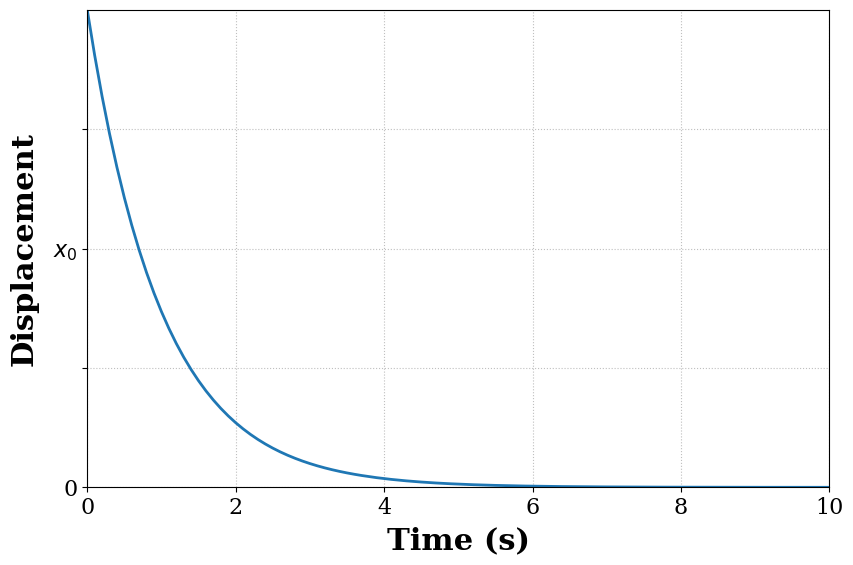

In [27]:
# Set format for figure and plot the results

# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Modify the axis units
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=16)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=16)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Activate and edit the grid
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', family='serif', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Displacement', family='serif', fontsize=22, weight='bold', labelpad=10)


plt.plot(t, x, linewidth=2, linestyle = '-', label=r'Response')

# Set axis limits
plt.xlim(0,10)
plt.ylim(0,2)

plt.yticks([0, 0.5, 1, 1.5], ['0', '', r'$x_0$', ''])


# # Create the legend, then fix the fontsize
# leg = plt.legend(loc='upper right', fancybox=True)
# ltext  = leg.get_texts()
# plt.setp(ltext,family='serif',fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad = 0.5)

# save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('Damped_free_vibration.pdf')

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

When the actual damping constant $c$ is larger than the critical damping value $c_c$, $\zeta>1$ the system is overdamped. The roots are different real and negative. It is no longer oscillatory and it takes the a longer time to return to equilibrium.

$\quad s_{1,2} = - \zeta\omega_n \pm \omega_n \sqrt{\zeta^2-1} $

The response of the system is then:

$\quad x(t) = C_1 e^{-\zeta \omega_n - \omega_n \sqrt{\zeta^2-1} t}+C_2 e^{-\zeta \omega_n +  \omega_n\sqrt{\zeta^2-1} t}$

$\quad x(t) = e^{-\zeta \omega_n t} \left( C_1 e^{-\omega_n \sqrt{\zeta^2-1} t}+ C_2 e^{\omega_n  \sqrt{\zeta^2-1} t} \right)$

Where:

$C_1=\frac {-\dot{x_0}+\left(-\zeta \sqrt{\zeta^2-1}\right) w_n x_0 }{2 w_n \sqrt{\zeta^2-1}}$

$C_2=\frac {\dot{x_0}+\left(\zeta \sqrt{\zeta^2-1}\right) w_n x_0 }{2 w_n \sqrt{\zeta^2-1}}$



In [41]:

# Calculate system response x(t)
z=1.2;
C1=-x0[1]+(-z+np.sqrt(z**2-1)*wn*x0[0])/(2*wn*np.sqrt(z**2-1))
C2=x0[1]+(z+np.sqrt(z**2-1)*wn*x0[0])/(2*wn*np.sqrt(z**2-1))

x = np.exp(-z*wn*t)*(C1*np.exp(-wn*np.sqrt(z**2-1)*t)+C2*np.exp(wn*np.sqrt(z**2-1)*t))




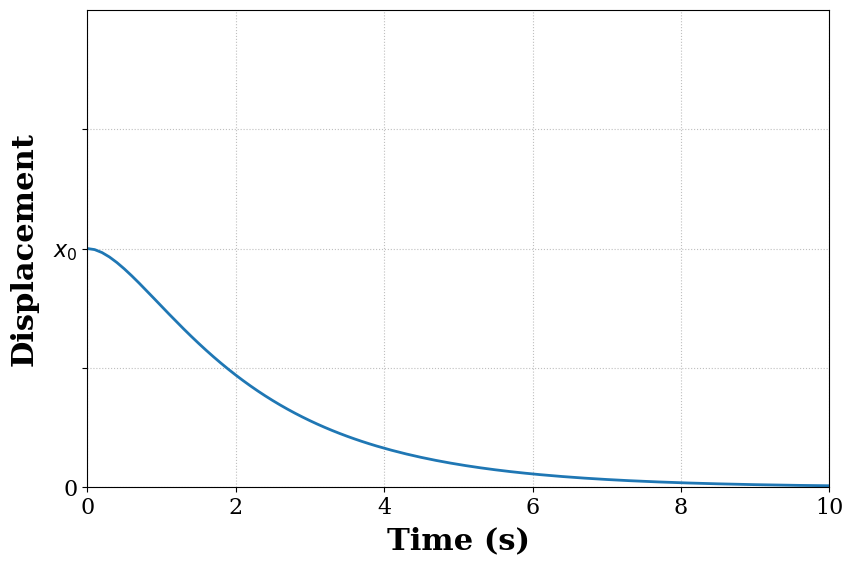

In [42]:
# Set format for figure and plot the results

# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Modify the axis units
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=16)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=16)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Activate and edit the grid
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', family='serif', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Displacement', family='serif', fontsize=22, weight='bold', labelpad=10)


plt.plot(t, x, linewidth=2, linestyle = '-', label=r'Response')

# Set axis limits
plt.xlim(0,10)
plt.ylim(0,2)

plt.yticks([0, 0.5, 1, 1.5], ['0', '', r'$x_0$', ''])


# # Create the legend, then fix the fontsize
# leg = plt.legend(loc='upper right', fancybox=True)
# ltext  = leg.get_texts()
# plt.setp(ltext,family='serif',fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad = 0.5)

# save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('Damped_free_vibration.pdf')

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook